## split 함수 만들기(다:1)

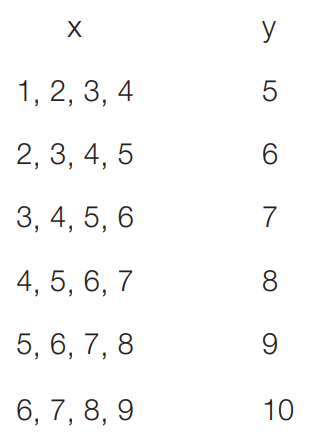

In [ ]:
Image('/content/drive/My Drive/Prediction of Time Series Walking in Deep Learning/pic/ch09_01.png', width=200)

In [ ]:
import numpy as np
dataset = np.array([1,2,3,4,5,6,7,8,9,10])

def split_xy1(dataset, time_steps):
    x, y = list(), list()
    for i in range(len(dataset)):
       end_number = i + time_steps
       if end_number > len(dataset) -1:
          break
       tmp_x, tmp_y = dataset[i:end_number], dataset[end_number]
       x.append(tmp_x)
       y.append(tmp_y)
    return np.array(x), np.array(y)

x, y = split_xy1(dataset, 4)
print(x, "\n", y)

[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]
 [6 7 8 9]] 
 [ 5  6  7  8  9 10]


## split 함수 만들기(다:다)

In [ ]:
import numpy as np
dataset = np.array([1,2,3,4,5,6,7,8,9,10])

def split_xy2(dataset, time_steps, y_column):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column # 추가
        if y_end_number > len(dataset): # 수정
           break
        tmp_x = dataset[i : x_end_number]
        tmp_y = dataset[x_end_number : y_end_number] # 수정
        x.append(tmp_x)
        y.append(tmp_y)
    return np.array(x), np.array(y)

time_steps = 4
y_column   = 2
x, y       = split_xy2(dataset, time_steps, y_column)

print(x, "\n", y)
print("x.shape : ", x.shape)
print("y.shape : ", y.shape)

[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]] 
 [[ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]]
x.shape :  (5, 4)
y.shape :  (5, 2)


## split 함수 만들기(다입력, 다:1)

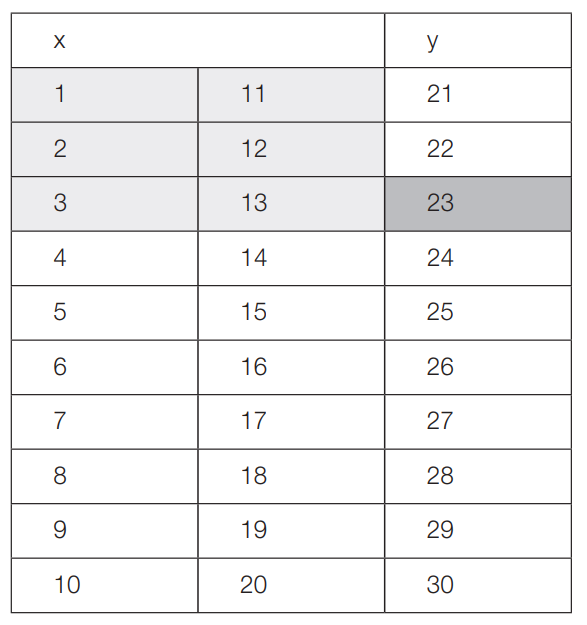

In [ ]:
Image('/content/drive/My Drive/Prediction of Time Series Walking in Deep Learning/pic/ch09_02.png', width=400)

In [ ]:
import numpy as np

dataset = np.array([[1,2,3,4,5,6,7,8,9,10],
                    [11,12,13,14,15,16,17,18,19,20],
                    [21,22,23,24,25,26,27,28,29,30]])
print("dataset.shape : ", dataset.shape)
dataset = np.transpose(dataset)
print(dataset)
print("dataset.shape : ", dataset.shape)

def split_xy3(dataset, time_steps, y_column):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column -1 # 수정
        if y_end_number > len(dataset): # 수정
            break
        tmp_x = dataset[i:x_end_number, :-1]
        tmp_y = dataset[x_end_number-1:y_end_number, -1] # 수정
        x.append(tmp_x)
        y.append(tmp_y)
    return np.array(x), np.array(y)

x, y = split_xy3(dataset, 3, 1)
print(x, "\n", y)
print(x.shape)
print(y.shape)

dataset.shape :  (3, 10)
[[ 1 11 21]
 [ 2 12 22]
 [ 3 13 23]
 [ 4 14 24]
 [ 5 15 25]
 [ 6 16 26]
 [ 7 17 27]
 [ 8 18 28]
 [ 9 19 29]
 [10 20 30]]
dataset.shape :  (10, 3)
[[[ 1 11]
  [ 2 12]
  [ 3 13]]

 [[ 2 12]
  [ 3 13]
  [ 4 14]]

 [[ 3 13]
  [ 4 14]
  [ 5 15]]

 [[ 4 14]
  [ 5 15]
  [ 6 16]]

 [[ 5 15]
  [ 6 16]
  [ 7 17]]

 [[ 6 16]
  [ 7 17]
  [ 8 18]]

 [[ 7 17]
  [ 8 18]
  [ 9 19]]

 [[ 8 18]
  [ 9 19]
  [10 20]]] 
 [[23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]]
(8, 3, 2)
(8, 1)


## split 함수 만들기(다입력, 다:다)

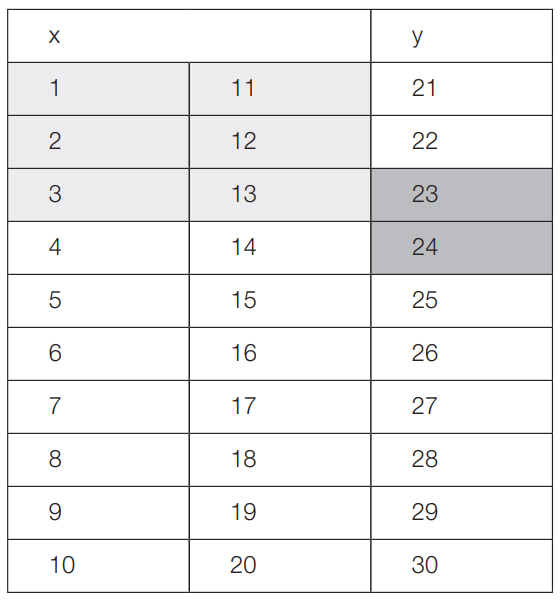

In [ ]:
Image('/content/drive/My Drive/Prediction of Time Series Walking in Deep Learning/pic/ch09_03.png', width=400)

In [ ]:
import numpy as np

dataset = np.array([[1,2,3,4,5,6,7,8,9,10],
                    [11,12,13,14,15,16,17,18,19,20],
                    [21,22,23,24,25,26,27,28,29,30]])
print("dataset.shape : ", dataset.shape)
dataset = np.transpose(dataset)
print(dataset)
print("dataset.shape : ", dataset.shape)

def split_xy3(dataset, time_steps, y_column):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column -1 # 수정
        if y_end_number > len(dataset): # 수정
            break
        tmp_x = dataset[i:x_end_number, :-1]
        tmp_y = dataset[x_end_number-1:y_end_number, -1] # 수정
        x.append(tmp_x)
        y.append(tmp_y)
    return np.array(x), np.array(y)

x, y = split_xy3(dataset, 3, 2) # 2를 1로 수정
print(x, "\n", y)
print(x.shape)
print(y.shape)

dataset.shape :  (3, 10)
[[ 1 11 21]
 [ 2 12 22]
 [ 3 13 23]
 [ 4 14 24]
 [ 5 15 25]
 [ 6 16 26]
 [ 7 17 27]
 [ 8 18 28]
 [ 9 19 29]
 [10 20 30]]
dataset.shape :  (10, 3)
[[[ 1 11]
  [ 2 12]
  [ 3 13]]

 [[ 2 12]
  [ 3 13]
  [ 4 14]]

 [[ 3 13]
  [ 4 14]
  [ 5 15]]

 [[ 4 14]
  [ 5 15]
  [ 6 16]]

 [[ 5 15]
  [ 6 16]
  [ 7 17]]

 [[ 6 16]
  [ 7 17]
  [ 8 18]]

 [[ 7 17]
  [ 8 18]
  [ 9 19]]] 
 [[23 24]
 [24 25]
 [25 26]
 [26 27]
 [27 28]
 [28 29]
 [29 30]]
(7, 3, 2)
(7, 2)


## split 함수 만들기(다입력, 다:다 두번째)

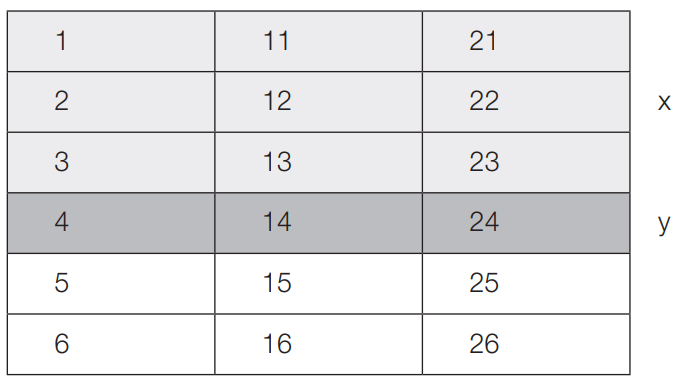

In [ ]:
Image('/content/drive/My Drive/Prediction of Time Series Walking in Deep Learning/pic/ch09_04.png', width=400)

In [ ]:
import numpy as np
dataset = np.array([[1,2,3,4,5,6,7,8,9,10],
                   [11,12,13,14,15,16,17,18,19,20],
                   [21,22,23,24,25,26,27,28,29,30]])
print("dataset.shape : ", dataset.shape)

dataset = np.transpose(dataset)
print(dataset)
print("dataset.shape : ", dataset.shape)

def split_xy5(dataset, time_steps, y_column):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column # 수정

        if y_end_number > len(dataset): # 수정
            break
        tmp_x = dataset[i:x_end_number, :] # 수정
        tmp_y = dataset[x_end_number:y_end_number, :] # 수정
        x.append(tmp_x)
        y.append(tmp_y)
    return np.array(x), np.array(y)

x, y = split_xy5(dataset, 3, 1)
print(x, "\n", y)
print(x.shape)
print(y.shape)

dataset.shape :  (3, 10)
[[ 1 11 21]
 [ 2 12 22]
 [ 3 13 23]
 [ 4 14 24]
 [ 5 15 25]
 [ 6 16 26]
 [ 7 17 27]
 [ 8 18 28]
 [ 9 19 29]
 [10 20 30]]
dataset.shape :  (10, 3)
[[[ 1 11 21]
  [ 2 12 22]
  [ 3 13 23]]

 [[ 2 12 22]
  [ 3 13 23]
  [ 4 14 24]]

 [[ 3 13 23]
  [ 4 14 24]
  [ 5 15 25]]

 [[ 4 14 24]
  [ 5 15 25]
  [ 6 16 26]]

 [[ 5 15 25]
  [ 6 16 26]
  [ 7 17 27]]

 [[ 6 16 26]
  [ 7 17 27]
  [ 8 18 28]]

 [[ 7 17 27]
  [ 8 18 28]
  [ 9 19 29]]] 
 [[[ 4 14 24]]

 [[ 5 15 25]]

 [[ 6 16 26]]

 [[ 7 17 27]]

 [[ 8 18 28]]

 [[ 9 19 29]]

 [[10 20 30]]]
(7, 3, 3)
(7, 1, 3)


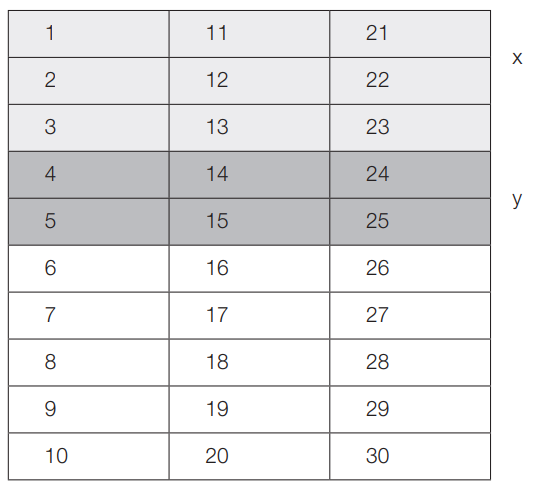

In [ ]:
Image('/content/drive/My Drive/Prediction of Time Series Walking in Deep Learning/pic/ch09_05.png', width=400)

In [ ]:
import numpy as np
dataset = np.array([[1,2,3,4,5,6,7,8,9,10],
                   [11,12,13,14,15,16,17,18,19,20],
                   [21,22,23,24,25,26,27,28,29,30]])
print("dataset.shape : ", dataset.shape)

dataset = np.transpose(dataset)
print(dataset)
print("dataset.shape : ", dataset.shape)

def split_xy5(dataset, time_steps, y_column):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column # 수정

        if y_end_number > len(dataset): # 수정
            break
        tmp_x = dataset[i:x_end_number, :] # 수정
        tmp_y = dataset[x_end_number:y_end_number, :] # 수정
        x.append(tmp_x)
        y.append(tmp_y)
    return np.array(x), np.array(y)

x, y = split_xy5(dataset, 3, 2)
print(x, "\n", y)
print(x.shape)
print(y.shape)


dataset.shape :  (3, 10)
[[ 1 11 21]
 [ 2 12 22]
 [ 3 13 23]
 [ 4 14 24]
 [ 5 15 25]
 [ 6 16 26]
 [ 7 17 27]
 [ 8 18 28]
 [ 9 19 29]
 [10 20 30]]
dataset.shape :  (10, 3)
[[[ 1 11 21]
  [ 2 12 22]
  [ 3 13 23]]

 [[ 2 12 22]
  [ 3 13 23]
  [ 4 14 24]]

 [[ 3 13 23]
  [ 4 14 24]
  [ 5 15 25]]

 [[ 4 14 24]
  [ 5 15 25]
  [ 6 16 26]]

 [[ 5 15 25]
  [ 6 16 26]
  [ 7 17 27]]

 [[ 6 16 26]
  [ 7 17 27]
  [ 8 18 28]]] 
 [[[ 4 14 24]
  [ 5 15 25]]

 [[ 5 15 25]
  [ 6 16 26]]

 [[ 6 16 26]
  [ 7 17 27]]

 [[ 7 17 27]
  [ 8 18 28]]

 [[ 8 18 28]
  [ 9 19 29]]

 [[ 9 19 29]
  [10 20 30]]]
(6, 3, 3)
(6, 2, 3)
